<a href="https://colab.research.google.com/github/saadmarwan16/logistic_regression/blob/main/logistic_xor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 4
D = 2

In [3]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

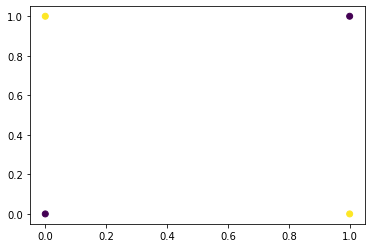

In [4]:
T = np.array([0, 1, 1, 0])

ones = np.array([[1]*N]).T

plt.scatter(X[:, 0], X[:, 1], c=T)
plt.show()

In [5]:
xy = np.matrix(X[:, 0] * X[:, 1]).T
Xb = np.array(np.concatenate((ones, xy, X), axis=1))

In [6]:
w = np.random.random(D+2)
z = Xb.dot(w)

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
Y = sigmoid(z)

In [9]:
def cross_entropy(T, Y):
    E = 0

    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])

    return E

In [10]:
learning_rate = 0.001
error = list()

for i in range(5000):
    e = cross_entropy(T, Y)
    error.append(e)

    if i % 100 == 0:
        print(e)

    w += learning_rate * (np.dot((T - Y).T, Xb) - 0.01*w)

    Y = sigmoid(Xb.dot(w))

3.5405898756054306
3.3998263255032306
3.2823420565076935
3.1844153849090375
3.102519404479518
3.033491930993972
2.9746285480614256
2.923704564211694
2.8789458460867925
2.838971133922022
2.802724135950247
2.7694072651064525
2.738423197505562
2.7093264821241316
2.6817851319700696
2.6555510229435972
2.630437555231332
2.606303050165761
2.5830385465550165
2.560558903599361
2.538796352902144
2.517695845143516
2.4972117014451705
2.4773052075726167
2.457942886399042
2.4390952566180237
2.420735939140244
2.40284101161532
2.3853885397903745
2.368358234799228
2.351731200111313
2.3354897423441296
2.3196172276204945
2.3040979704782187
2.28891714612694
2.2740607195354285
2.2595153867384847
2.2452685251019435
2.2313081502383842
2.2176228779400278
2.2042018899706726
2.191034902893444
2.1781121393468523
2.165424301347304
2.152962545312524
2.140718458581888
2.128684037266807
2.116851665304281
2.105214094614787
2.0937644262852464


Text(0.5, 1.0, 'Cross-entropy')

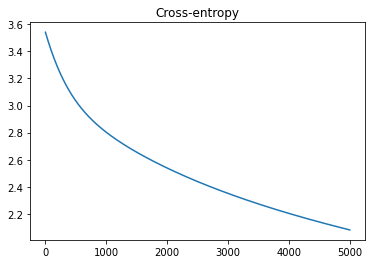

In [11]:
plt.plot(error)
plt.title('Cross-entropy')

In [12]:
print(f"Final w: {w}")
print(f"Final classification rate: {1 - np.abs(T - np.round(Y)).sum() / N}")

Final w: [-0.05901985 -1.61023373  0.31554369  0.58352751]
Final classification rate: 1.0
